In [1]:
import numpy as np
np.seterr(all='ignore')
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter, ListedColormap
from matplotlib import cm

%matplotlib inline

np.random.seed(seed=1)

In [2]:
# 2クラス分類: 青(t = 1)と赤(t = 0)
num_of_samples_per_class = 20
red_mean = [-1, 0] # 赤クラスは(-1, 0)周辺に分布
blue_mean = [1, 0] # 青クラスは(1, 0)周辺に分布
std_dev = 1.2

# 2クラスのサンプルを生成
x_red = np.random.randn(num_of_samples_per_class, 2) * std_dev + red_mean
x_blue = np.random.randn(num_of_samples_per_class, 2) * std_dev + blue_mean

# 生成したサンプルのマージ
X = np.vstack((x_red, x_blue))

# サンプルのクラス
t = np.vstack((np.zeros((num_of_samples_per_class, 1)), np.ones((num_of_samples_per_class, 1))))

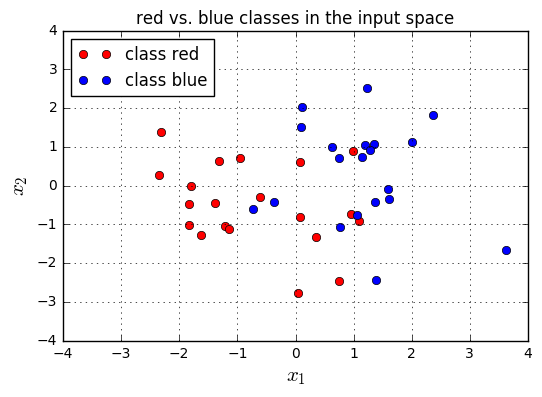

In [3]:
plt.plot(x_red[:, 0], x_red[:, 1], 'ro', label='class red')
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label='class blue')
plt.grid()
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.axis([-4, 4, -4, 4])
plt.title('red vs. blue classes in the input space')
plt.show()

In [4]:
# ロジスティック関数の定義
def logistic(z):
    return 1 / (1 + np.exp(-z))

# ニューラルネットワークを定義
def nn(x, w):
    return logistic(x.dot(w.T))

# モデルの出力をもとにクラスtを予測する関数
def nn_predict(x, w):
    return np.around(nn(x, w))

# コスト関数 (クロスエントロピー)
def cost(y, t):
    return -np.sum(np.multiply(t, np.log(y)) + np.multiply((1 - t), np.log(1 - y)))

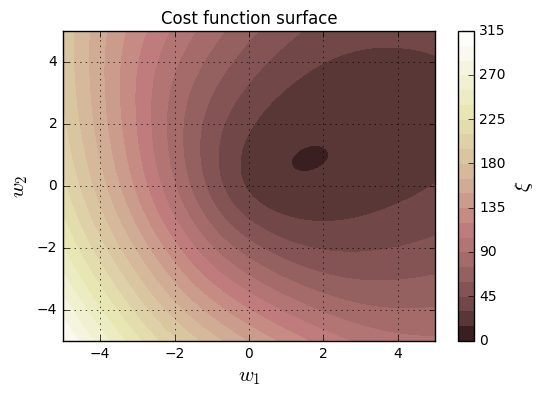

In [7]:
num_of_ws = 100
ws1 = np.linspace(-5, 5, num=num_of_ws)
ws2 = np.linspace(-5, 5, num=num_of_ws)
ws_x, ws_y = np.meshgrid(ws1, ws2)
cost_ws = np.zeros((num_of_ws, num_of_ws))

for i in range(num_of_ws):
    for j in range(num_of_ws):
        cost_ws[i, j] = cost(nn(X, np.asmatrix([ws_x[i, j], ws_y[i, j]])), t)
        
plt.contourf(ws_x, ws_y, cost_ws, 20, cmap=cm.pink)
cbar = plt.colorbar()
cbar.ax.set_ylabel('$\\xi$', fontsize=15)
plt.xlabel('$w_1$', fontsize=15)
plt.ylabel('$w_2$', fontsize=15)
plt.title('Cost function surface')
plt.grid()
plt.show()

In [8]:
# 勾配の定義
def gradient(w, x, t):
        return (nn(x, w) - t).T * x

# Δw
def delta_w(w_k, x, t, learning_rate):
    return learning_rate * gradient(w_k, x, t)

In [9]:
# 初期重みをセット
w = np.asmatrix([-4, -2])

# 学習率
learning_rate = 0.05

# 最急降下法のイテレーションを開始
num_of_iterations = 10
w_iter = [w] # 後の可視化のために、イテレーションごとの重みをここに保存します
for i in range(num_of_iterations):
    dw = delta_w(w, X, t, learning_rate)
    w = w - dw
    w_iter.append(w)

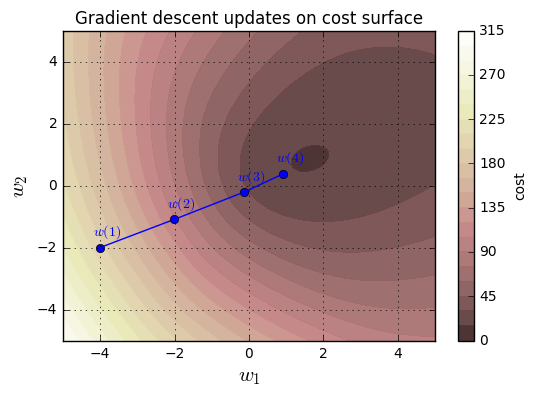

In [10]:
plt.contourf(ws_x, ws_y, cost_ws, 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()
cbar.ax.set_ylabel('cost')

for i in range(1, 4): 
    w1 = w_iter[i-1]
    w2 = w_iter[i]
    # Plot the weight-cost value and the line that represents the update
    plt.plot(w1[0,0], w1[0,1], 'bo')  # Plot the weight cost value
    plt.plot([w1[0,0], w2[0,0]], [w1[0,1], w2[0,1]], 'b-')
    plt.text(w1[0,0]-0.2, w1[0,1]+0.4, '$w({})$'.format(i), color='b')
w1 = w_iter[3]  
# Plot the last weight
plt.plot(w1[0,0], w1[0,1], 'bo')
plt.text(w1[0,0]-0.2, w1[0,1]+0.4, '$w({})$'.format(4), color='b') 
# Show figure
plt.xlabel('$w_1$', fontsize=15)
plt.ylabel('$w_2$', fontsize=15)
plt.title('Gradient descent updates on cost surface')
plt.grid()
plt.show()

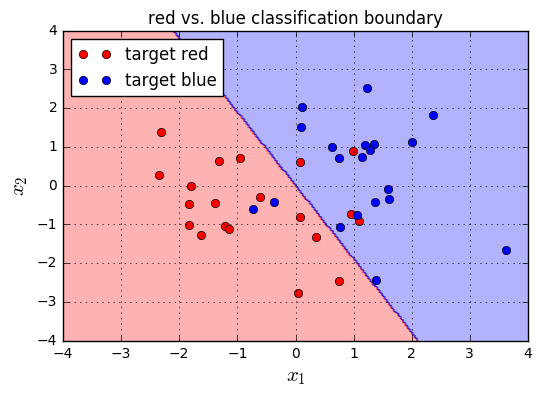

In [16]:
# 入力(x_1, x_2)を[-4, 4]の範囲で可視化するため、[-4, 4]を200分割したメッシュを用意します
num_of_xs = 200
xs1 = np.linspace(-4, 4, num=num_of_xs)
xs2 = np.linspace(-4, 4, num=num_of_xs)
xx, yy = np.meshgrid(xs1, xs2)

# 各点でモデルの出力がどちらのクラスになるかを、
# nn_predict関数を使用して予測します。
classification_plane = np.zeros((num_of_xs, num_of_xs))
for i in range(num_of_xs):
    for j in range(num_of_xs):
        classification_plane[i, j] = nn_predict(np.asmatrix([xx[i, j], yy[i, j]]), w)

cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.30),
        colorConverter.to_rgba('b', alpha=0.30)])

# 予測したクラスと、元の入力をプロットしてあげます
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.plot(x_red[:, 0], x_red[:, 1], 'ro', label='target red')
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label='target blue')
plt.grid()
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.title('red vs. blue classification boundary')
plt.show()